In [11]:
import pandas as pd

In [12]:
data = pd.read_pickle("preparedData.pkl")
data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [13]:
# Create a second DataFrame 'data_with_nulls' with rows where either 'userID' or 'kWhDelivered' have null values
data_with_nulls = data[data['userID'].isnull() | data['kWhDelivered'].isnull()]


In [14]:
# Create a second DataFrame 'data_with_nulls' with rows where either 'userID' or 'kWhDelivered' have null values
data_with_nulls = data[data['userID'].isnull() | data['kWhDelivered'].isnull()]

# Drop the 'userID' and 'kWhDelivered' columns from 'data_with_nulls'
data_with_nulls = data_with_nulls.drop(['userID', 'kWhDelivered','WhPerMile','minutesAvailable','modifiedAt','paymentRequired','requestedDeparture'], axis=1)


In [15]:
data_with_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15227 entries, 11 to 56493
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          15227 non-null  datetime64[ns, UTC]
 1   disconnectTime          15227 non-null  datetime64[ns, UTC]
 2   doneChargingTime        15227 non-null  datetime64[ns, UTC]
 3   siteID                  15227 non-null  int64              
 4   combinedSpaceStationID  15227 non-null  object             
 5   timeConnected           15227 non-null  float64            
 6   idleTime                15227 non-null  float64            
 7   chargingTime            15227 non-null  float64            
 8   weekday                 15227 non-null  int32              
 9   month                   15227 non-null  int32              
 10  time                    15227 non-null  object             
 11  kWhRequested            0 non-null      float

In [8]:
data_withoutNull=data.dropna()

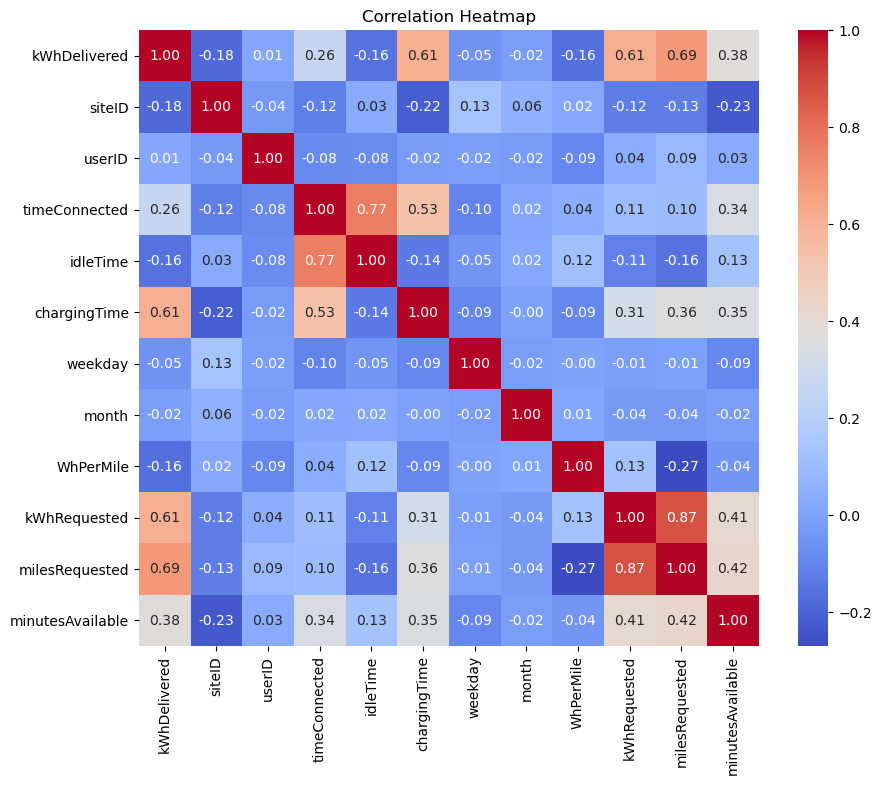

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate or load your DataFrame 'data' here

# Remove non-numeric columns from the DataFrame
numeric_data = data_withoutNull.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


In [10]:
correlation_matrix

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable
kWhDelivered,1.000000,-0.183231,0.014270,0.262021,-0.157358,0.609741,-0.052976,-0.021284,-0.162864,0.612627,0.685698,0.377159
siteID,-0.183231,1.000000,-0.035630,-0.117949,0.029926,-0.220771,0.133747,0.058589,0.017910,-0.123498,-0.126514,-0.229267
userID,0.014270,-0.035630,1.000000,-0.083162,-0.080221,-0.022646,-0.015109,-0.023358,-0.092709,0.039297,0.087693,0.029206
timeConnected,0.262021,-0.117949,-0.083162,1.000000,0.765099,0.534265,-0.102343,0.015448,0.039848,0.106109,0.098237,0.337100
idleTime,-0.157358,0.029926,-0.080221,0.765099,1.000000,-0.135545,-0.048040,0.021656,0.117844,-0.112888,-0.155774,0.129130
chargingTime,0.609741,-0.220771,-0.022646,0.534265,-0.135545,1.000000,-0.094407,-0.004660,-0.093390,0.311464,0.355652,0.349168
weekday,-0.052976,0.133747,-0.015109,-0.102343,-0.048040,-0.094407,1.000000,-0.020881,-0.002576,-0.013813,-0.012422,-0.093781
month,-0.021284,0.058589,-0.023358,0.015448,0.021656,-0.004660,-0.020881,1.000000,0.010129,-0.036495,-0.036437,-0.019745
WhPerMile,-0.162864,0.017910,-0.092709,0.039848,0.117844,-0.093390,-0.002576,0.010129,1.000000,0.127928,-0.270614,-0.043399
kWhRequested,0.612627,-0.123498,0.039297,0.106109,-0.112888,0.311464,-0.013813,-0.036495,0.127928,1.000000,0.873915,0.407138


In [11]:
#drop high correlated features
import pandas as pd
import numpy as np

# Generate or load your DataFrame 'data' here

# Remove non-numeric columns from the DataFrame
numeric_data = data_withoutNull.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Define a threshold for correlation
threshold = 0.8  # Adjust this threshold as needed

# Find pairs of highly correlated features
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > threshold)

# Create a set to keep track of columns to drop
columns_to_drop = set()

# Iterate through the pairs of highly correlated features and decide which ones to drop
for i, j in zip(*highly_correlated_pairs):
    if i != j:
        feature_i = numeric_data.columns[i]
        feature_j = numeric_data.columns[j]
        # Drop one of the features based on your choice
        # You can add your logic here to decide which feature to drop
        # For example, you can drop the one with lower importance in your analysis
        columns_to_drop.add(feature_i)  # Drop feature_i
        # columns_to_drop.add(feature_j)  # Or drop feature_j if you prefer

# Drop the highly correlated columns from the DataFrame
data_withoutNull.drop(columns=columns_to_drop, inplace=True)

# Now, your DataFrame 'data' should have the highly correlated features removed.


<ipython-input-11-b6c8e1e48e43>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_withoutNull.drop(columns=columns_to_drop, inplace=True)


In [12]:
correlation_matrix

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,kWhRequested,milesRequested,minutesAvailable
kWhDelivered,1.000000,-0.183231,0.014270,0.262021,-0.157358,0.609741,-0.052976,-0.021284,-0.162864,0.612627,0.685698,0.377159
siteID,-0.183231,1.000000,-0.035630,-0.117949,0.029926,-0.220771,0.133747,0.058589,0.017910,-0.123498,-0.126514,-0.229267
userID,0.014270,-0.035630,1.000000,-0.083162,-0.080221,-0.022646,-0.015109,-0.023358,-0.092709,0.039297,0.087693,0.029206
timeConnected,0.262021,-0.117949,-0.083162,1.000000,0.765099,0.534265,-0.102343,0.015448,0.039848,0.106109,0.098237,0.337100
idleTime,-0.157358,0.029926,-0.080221,0.765099,1.000000,-0.135545,-0.048040,0.021656,0.117844,-0.112888,-0.155774,0.129130
chargingTime,0.609741,-0.220771,-0.022646,0.534265,-0.135545,1.000000,-0.094407,-0.004660,-0.093390,0.311464,0.355652,0.349168
weekday,-0.052976,0.133747,-0.015109,-0.102343,-0.048040,-0.094407,1.000000,-0.020881,-0.002576,-0.013813,-0.012422,-0.093781
month,-0.021284,0.058589,-0.023358,0.015448,0.021656,-0.004660,-0.020881,1.000000,0.010129,-0.036495,-0.036437,-0.019745
WhPerMile,-0.162864,0.017910,-0.092709,0.039848,0.117844,-0.093390,-0.002576,0.010129,1.000000,0.127928,-0.270614,-0.043399
kWhRequested,0.612627,-0.123498,0.039297,0.106109,-0.112888,0.311464,-0.013813,-0.036495,0.127928,1.000000,0.873915,0.407138


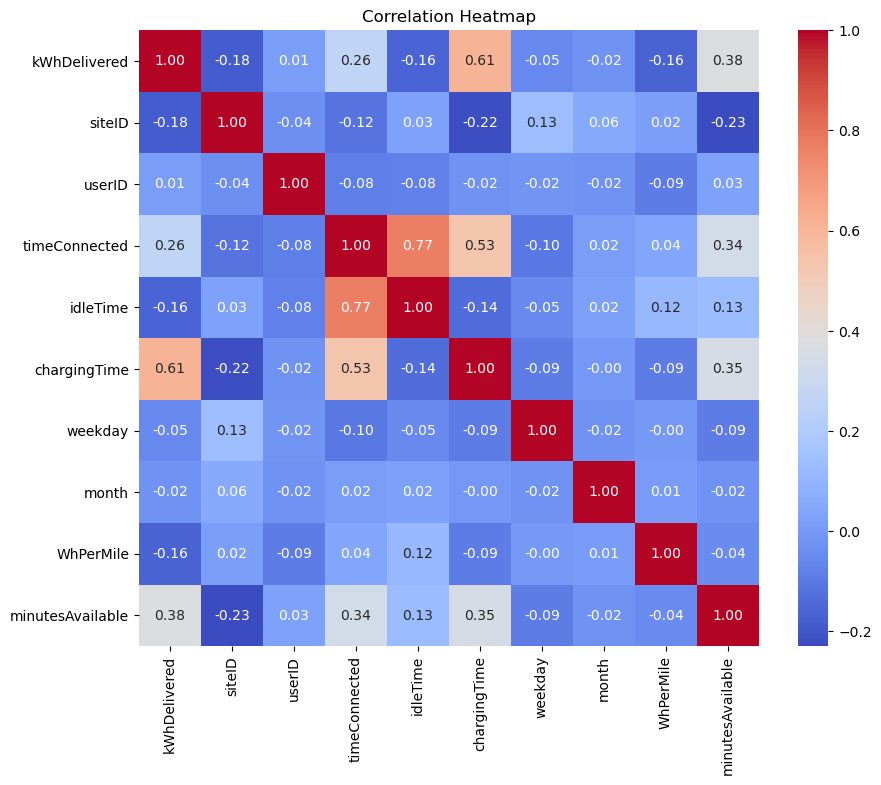

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate or load your DataFrame 'data' here

# Remove non-numeric columns from the DataFrame
numeric_data = data_withoutNull.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [14]:
correlation_matrix

,kWhDelivered,siteID,userID,timeConnected,idleTime,chargingTime,weekday,month,WhPerMile,minutesAvailable
kWhDelivered,1.000000,-0.183231,0.014270,0.262021,-0.157358,0.609741,-0.052976,-0.021284,-0.162864,0.377159
siteID,-0.183231,1.000000,-0.035630,-0.117949,0.029926,-0.220771,0.133747,0.058589,0.017910,-0.229267
userID,0.014270,-0.035630,1.000000,-0.083162,-0.080221,-0.022646,-0.015109,-0.023358,-0.092709,0.029206
timeConnected,0.262021,-0.117949,-0.083162,1.000000,0.765099,0.534265,-0.102343,0.015448,0.039848,0.337100
idleTime,-0.157358,0.029926,-0.080221,0.765099,1.000000,-0.135545,-0.048040,0.021656,0.117844,0.129130
chargingTime,0.609741,-0.220771,-0.022646,0.534265,-0.135545,1.000000,-0.094407,-0.004660,-0.093390,0.349168
weekday,-0.052976,0.133747,-0.015109,-0.102343,-0.048040,-0.094407,1.000000,-0.020881,-0.002576,-0.093781
month,-0.021284,0.058589,-0.023358,0.015448,0.021656,-0.004660,-0.020881,1.000000,0.010129,-0.019745
WhPerMile,-0.162864,0.017910,-0.092709,0.039848,0.117844,-0.093390,-0.002576,0.010129,1.000000,-0.043399
minutesAvailable,0.377159,-0.229267,0.029206,0.337100,0.129130,0.349168,-0.093781,-0.019745,-0.043399,1.000000


C:\Users\berra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-27-e9bdbfb24459>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster_Labels'] = cluster_labels


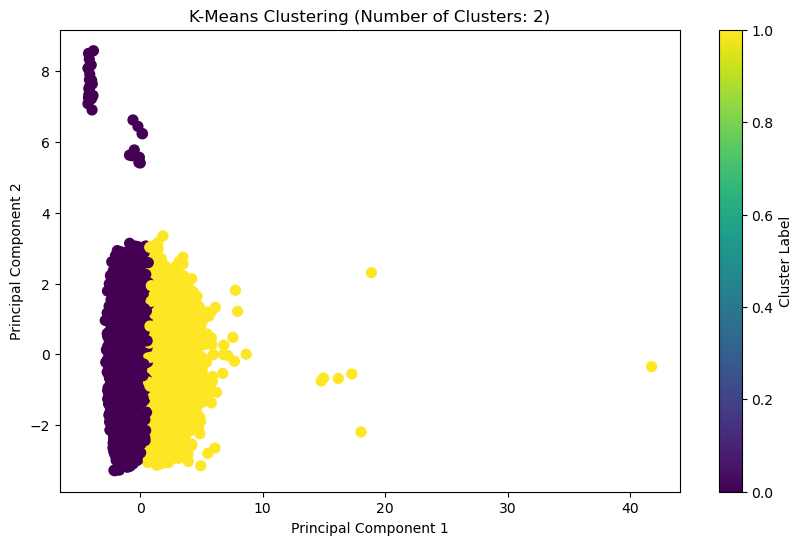

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with your features
selected_features = ['kWhDelivered', 'chargingTime', 'weekday', 'month', 'WhPerMile', 'minutesAvailable']
data_selected = data[selected_features]

# Remove rows with missing values
data_cleaned = data_selected.dropna()

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Determine the number of clusters (you can use various methods for this)
# For simplicity, let's assume you choose a specific number of clusters (e.g., 3)
n_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the cleaned DataFrame 'data_cleaned'
data_cleaned['Cluster_Labels'] = cluster_labels

# Visualize the clustering results using PCA for dimensionality reduction (2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


C:\Users\berra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-28-4ec0c8137b6a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster_Labels'] = cluster_labels


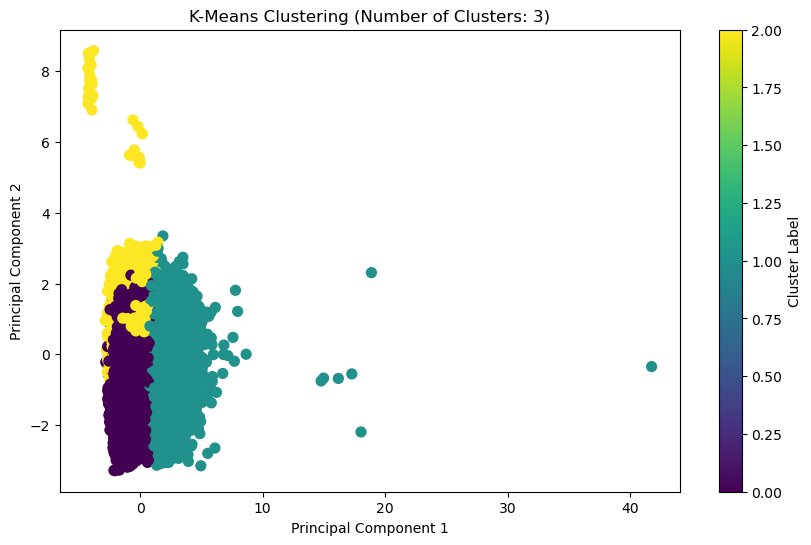

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with your features
selected_features = ['kWhDelivered', 'chargingTime', 'weekday', 'month', 'WhPerMile', 'minutesAvailable']
data_selected = data[selected_features]

# Remove rows with missing values
data_cleaned = data_selected.dropna()

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Determine the number of clusters (you can use various methods for this)
# For simplicity, let's assume you choose a specific number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the cleaned DataFrame 'data_cleaned'
data_cleaned['Cluster_Labels'] = cluster_labels

# Visualize the clustering results using PCA for dimensionality reduction (2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reduced_X = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [29]:
correlation__matrix

NameError: name 'correlation__matrix' is not defined

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate or load your DataFrame 'data' here

# Filter the DataFrame to keep only numeric columns
numeric_data = data_withoutNull.select_dtypes(include=[np.number])

# Impute missing values (you can customize the strategy)
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Perform feature scaling (optional but recommended for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_imputed)

# Determine the number of clusters (you can use various methods for this)
# For simplicity, let's assume you choose a specific number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to your DataFrame
data['Cluster_Labels'] = cluster_labels

# Visualize the clustering results (for 2D data, you can choose two features to plot)
# Here, we'll assume you have a 2D DataFrame (replace 'feature1' and 'feature2' with actual feature names)
feature1 = 'Feature1'
feature2 = 'Feature2'

plt.figure(figsize=(10, 6))
plt.scatter(data_withoutNull[feature1], data_withoutNull[feature2], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Cluster Label')
plt.show()


C:\Users\berra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Length of values (41309) does not match length of index (56536)

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with your features
X=data_withoutNull

# Perform feature scaling (optional but recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Determine the number of clusters (you can use various methods for this)
# For simplicity, let's assume you choose a specific number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to your original DataFrame 'data'
data['Cluster_Labels'] = cluster_labels

# Visualize the clustering results using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


NameError: name 'X_cleaned' is not defined